In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('bor2hci.csv')

In [3]:
dataset.head()

,Date,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
0,01/10/91,1012.0,16,26.0,97.269231,502.084574,0.0,193.730769,0.0
1,01/11/91,1027.0,16,29.5,163.762712,1075.706969,0.0,152.237288,0.0
2,01/12/91,1050.0,20,30.7,190.977199,258.863526,0.0,737.752443,0.0
3,01/01/92,950.0,20,31.0,241.193548,233.291732,0.0,1033.870968,0.0
4,01/02/92,900.0,28,27.1,263.284133,234.218560,0.0,1124.095941,0.0


In [4]:
dataset.shape

(275, 9)

In [5]:
dataset['Date'].head()

0    01/10/91
1    01/11/91
2    01/12/91
3    01/01/92
4    01/02/92
Name: Date, dtype: object

In [6]:
data=pd.to_datetime(dataset['Date'])

In [7]:
#dataset.head()
dataset=dataset.set_index(['Date'])


In [8]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/10/91,1012.0,16,26.0,97.269231,502.084574,0.0,193.730769,0.0
01/11/91,1027.0,16,29.5,163.762712,1075.706969,0.0,152.237288,0.0
01/12/91,1050.0,20,30.7,190.977199,258.863526,0.0,737.752443,0.0
01/01/92,950.0,20,31.0,241.193548,233.291732,0.0,1033.870968,0.0
01/02/92,900.0,28,27.1,263.284133,234.218560,0.0,1124.095941,0.0


In [9]:
#dataset=dataset.drop('Date', axis=1)
#dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)

In [10]:
dataset.to_csv('bori2hci.csv')

In [11]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/10/91,1012.0,16,26.0,97.269231,502.084574,0.0,193.730769,0.0
01/11/91,1027.0,16,29.5,163.762712,1075.706969,0.0,152.237288,0.0
01/12/91,1050.0,20,30.7,190.977199,258.863526,0.0,737.752443,0.0
01/01/92,950.0,20,31.0,241.193548,233.291732,0.0,1033.870968,0.0
01/02/92,900.0,28,27.1,263.284133,234.218560,0.0,1124.095941,0.0


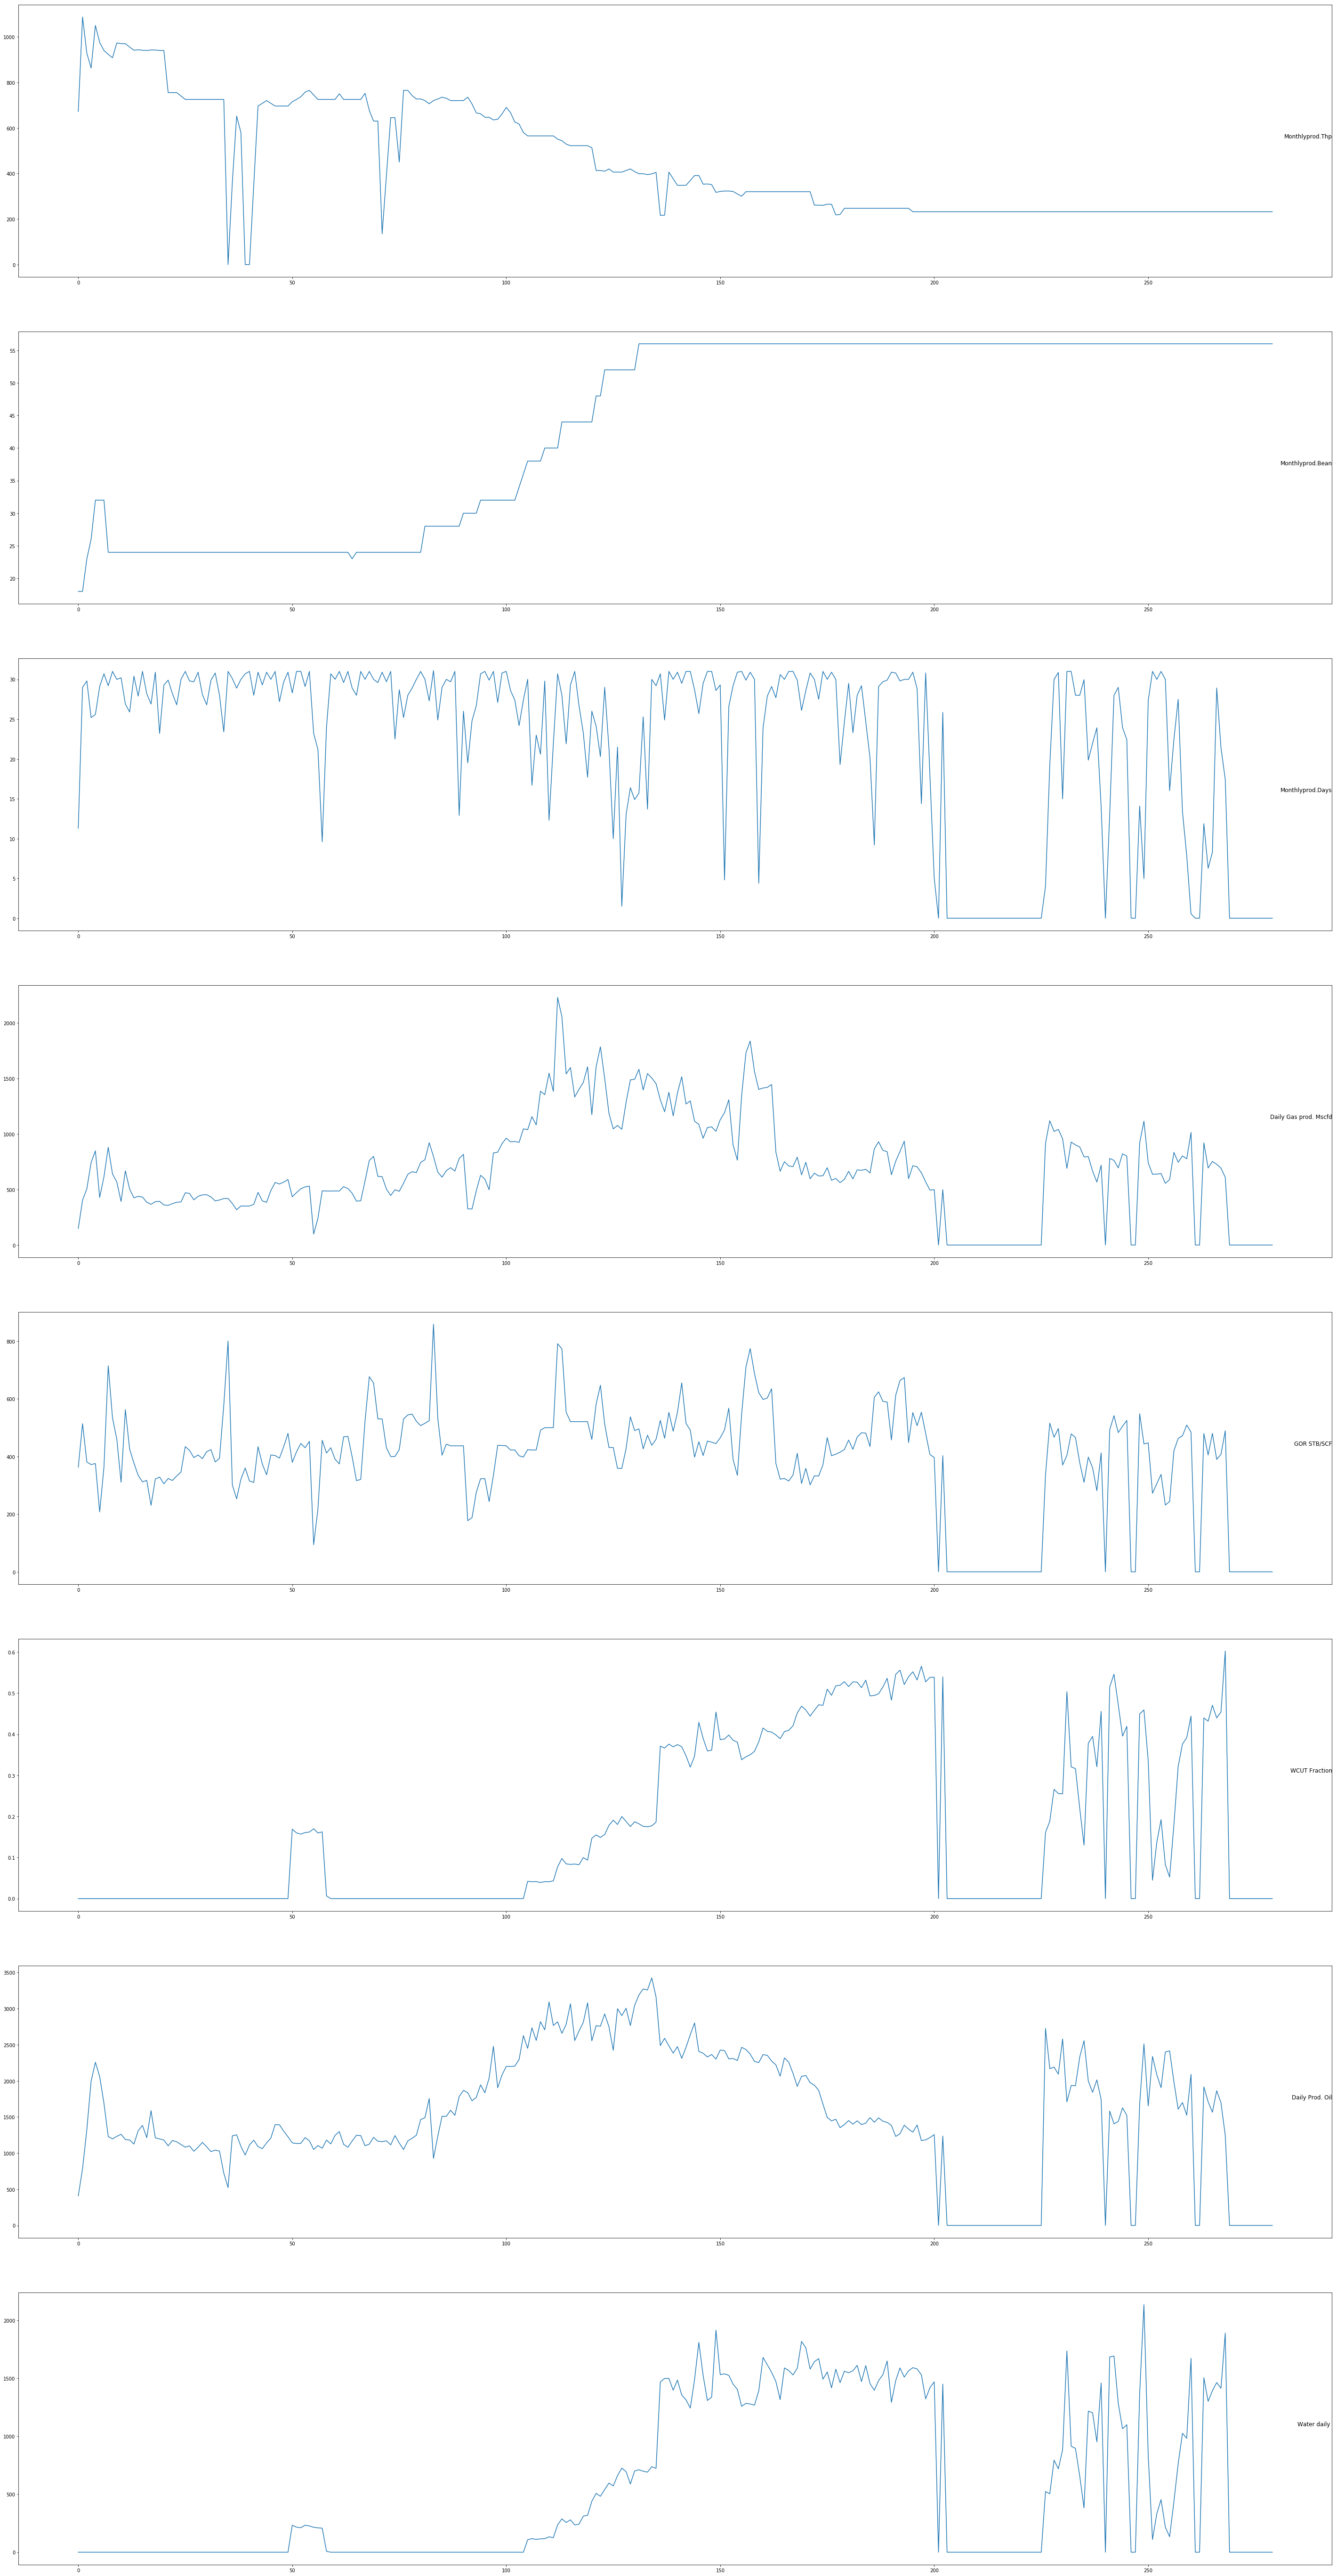

In [12]:
dataset = pd.read_csv('borihci.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0,1,2,3,4,5,6,7]
i = 1
# plot each column
plt.figure(figsize=(50,100))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [13]:
#dataset.values

In [14]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#from keras.layers import DropConnect

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('borihci.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,0] = encoder.fit_transform(values[:,0])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[14,15,16,17,18,22,23,
           #                    24,25,26,27]], axis=1, inplace=True)
#print(reframed.head())

Using TensorFlow backend.


In [15]:
reframed[reframed.columns[2]].head()
reframed.shape

(279, 16)

In [16]:
# split into train and test sets
values = reframed.values
n_train_months = (21*12) + 3
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-8], train[:, -8:]
test_X, test_y = test[:, :-8], test[:, -8:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(255, 1, 8) (255, 8) (24, 1, 8) (24, 8)


Train on 255 samples, validate on 24 samples
Epoch 1/500
 - 3s - loss: 0.4468 - val_loss: 0.3304
Epoch 2/500
 - 0s - loss: 0.4315 - val_loss: 0.3268
Epoch 3/500
 - 0s - loss: 0.4131 - val_loss: 0.3222
Epoch 4/500
 - 0s - loss: 0.3894 - val_loss: 0.3166
Epoch 5/500
 - 0s - loss: 0.3618 - val_loss: 0.3165
Epoch 6/500
 - 0s - loss: 0.3388 - val_loss: 0.3265
Epoch 7/500
 - 0s - loss: 0.3301 - val_loss: 0.3353
Epoch 8/500
 - 0s - loss: 0.3301 - val_loss: 0.3396
Epoch 9/500
 - 0s - loss: 0.3297 - val_loss: 0.3388
Epoch 10/500
 - 0s - loss: 0.3292 - val_loss: 0.3370
Epoch 11/500
 - 0s - loss: 0.3292 - val_loss: 0.3360
Epoch 12/500
 - 0s - loss: 0.3287 - val_loss: 0.3359
Epoch 13/500
 - 0s - loss: 0.3288 - val_loss: 0.3361
Epoch 14/500
 - 0s - loss: 0.3282 - val_loss: 0.3367
Epoch 15/500
 - 0s - loss: 0.3233 - val_loss: 0.3385
Epoch 16/500
 - 0s - loss: 0.3148 - val_loss: 0.3407
Epoch 17/500
 - 0s - loss: 0.3065 - val_loss: 0.3449
Epoch 18/500
 - 0s - loss: 0.2979 - val_loss: 0.3501
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.2456 - val_loss: 0.3529
Epoch 155/500
 - 0s - loss: 0.2455 - val_loss: 0.3518
Epoch 156/500
 - 0s - loss: 0.2458 - val_loss: 0.3512
Epoch 157/500
 - 0s - loss: 0.2455 - val_loss: 0.3514
Epoch 158/500
 - 0s - loss: 0.2450 - val_loss: 0.3515
Epoch 159/500
 - 0s - loss: 0.2447 - val_loss: 0.3512
Epoch 160/500
 - 0s - loss: 0.2448 - val_loss: 0.3501
Epoch 161/500
 - 0s - loss: 0.2453 - val_loss: 0.3495
Epoch 162/500
 - 0s - loss: 0.2446 - val_loss: 0.3494
Epoch 163/500
 - 0s - loss: 0.2443 - val_loss: 0.3489
Epoch 164/500
 - 0s - loss: 0.2437 - val_loss: 0.3475
Epoch 165/500
 - 0s - loss: 0.2436 - val_loss: 0.3469
Epoch 166/500
 - 0s - loss: 0.2433 - val_loss: 0.3471
Epoch 167/500
 - 0s - loss: 0.2436 - val_loss: 0.3461
Epoch 168/500
 - 0s - loss: 0.2426 - val_loss: 0.3450
Epoch 169/500
 - 0s - loss: 0.2429 - val_loss: 0.3442
Epoch 170/500
 - 0s - loss: 0.2430 - val_loss: 0.3445
Epoch 171/500
 - 0s - loss: 0.2421 - val_loss: 0.3441
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.2093 - val_loss: 0.2738
Epoch 307/500
 - 0s - loss: 0.2093 - val_loss: 0.2735
Epoch 308/500
 - 0s - loss: 0.2093 - val_loss: 0.2738
Epoch 309/500
 - 0s - loss: 0.2097 - val_loss: 0.2736
Epoch 310/500
 - 0s - loss: 0.2085 - val_loss: 0.2731
Epoch 311/500
 - 0s - loss: 0.2092 - val_loss: 0.2730
Epoch 312/500
 - 0s - loss: 0.2091 - val_loss: 0.2733
Epoch 313/500
 - 0s - loss: 0.2084 - val_loss: 0.2737
Epoch 314/500
 - 0s - loss: 0.2089 - val_loss: 0.2734
Epoch 315/500
 - 0s - loss: 0.2095 - val_loss: 0.2732
Epoch 316/500
 - 0s - loss: 0.2090 - val_loss: 0.2729
Epoch 317/500
 - 0s - loss: 0.2090 - val_loss: 0.2724
Epoch 318/500
 - 0s - loss: 0.2096 - val_loss: 0.2723
Epoch 319/500
 - 0s - loss: 0.2089 - val_loss: 0.2725
Epoch 320/500
 - 0s - loss: 0.2090 - val_loss: 0.2726
Epoch 321/500
 - 0s - loss: 0.2097 - val_loss: 0.2724
Epoch 322/500
 - 0s - loss: 0.2084 - val_loss: 0.2723
Epoch 323/500
 - 0s - loss: 0.2093 - val_loss: 0.2725
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.2049 - val_loss: 0.2614
Epoch 459/500
 - 0s - loss: 0.2052 - val_loss: 0.2610
Epoch 460/500
 - 0s - loss: 0.2038 - val_loss: 0.2610
Epoch 461/500
 - 0s - loss: 0.2053 - val_loss: 0.2613
Epoch 462/500
 - 0s - loss: 0.2050 - val_loss: 0.2612
Epoch 463/500
 - 0s - loss: 0.2059 - val_loss: 0.2614
Epoch 464/500
 - 0s - loss: 0.2048 - val_loss: 0.2611
Epoch 465/500
 - 0s - loss: 0.2043 - val_loss: 0.2604
Epoch 466/500
 - 0s - loss: 0.2043 - val_loss: 0.2607
Epoch 467/500
 - 0s - loss: 0.2057 - val_loss: 0.2604
Epoch 468/500
 - 0s - loss: 0.2049 - val_loss: 0.2607
Epoch 469/500
 - 0s - loss: 0.2047 - val_loss: 0.2603
Epoch 470/500
 - 0s - loss: 0.2052 - val_loss: 0.2605
Epoch 471/500
 - 0s - loss: 0.2056 - val_loss: 0.2605
Epoch 472/500
 - 0s - loss: 0.2054 - val_loss: 0.2605
Epoch 473/500
 - 0s - loss: 0.2047 - val_loss: 0.2604
Epoch 474/500
 - 0s - loss: 0.2045 - val_loss: 0.2608
Epoch 475/500
 - 0s - loss: 0.2047 - val_loss: 0.2605
Epoch 476/500
 - 0s - loss: 

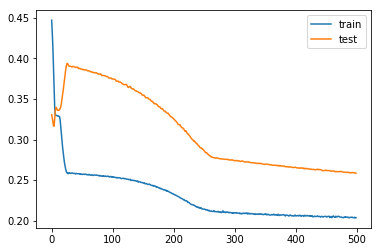

In [17]:
# design network
model = Sequential()
model.add(LSTM(90, activation='softmax',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.019))
model.add(Dense(120,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.02))
model.add(Dense(8,activation='relu'))
model.compile(optimizer='adam', loss='mae')
# fit network
history = model.fit(train_X,train_y,epochs=500,validation_data=(test_X, test_y),verbose=2,shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:,8:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,4:7]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 8))
inv_y = concatenate((test_y, test_X[:,8:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 379.024


In [19]:
#print(yhat.shape[0])
#print(yhat.shape)
#print(test_X.shape)

In [20]:
i = 0
h = int(yhat.shape[0])
while i < h:
    x = yhat
    x = x.reshape((x.shape[0], 1, x.shape[1]))
    yhat = model.predict(x)
    i=i+1

In [21]:
xhat = yhat
xhat = concatenate((xhat, test_X[:,8:]), axis=1)
xhat = scaler.inverse_transform(xhat)
hcihat = xhat[:,4:7] 
print(hcihat)

[[ 395.0267     0.      1182.6998 ]
 [ 395.03302    0.      1182.7362 ]
 [ 395.0319     0.      1182.7297 ]
 [ 395.02875    0.      1182.7108 ]
 [ 395.0241     0.      1182.6841 ]
 [ 395.03134    0.      1182.7263 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 395.03244    0.      1182.7329 ]
 [ 395.0198     0.      1182.6587 ]
 [ 395.02426    0.      1182.6854 ]
 [ 395.0337     0.      1182.7404 ]
 [ 395.02948    0.      1182.7155 ]
 [ 395.0243     0.      1182.685  ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]
 [ 394.5945     0.      1180.1714 ]]


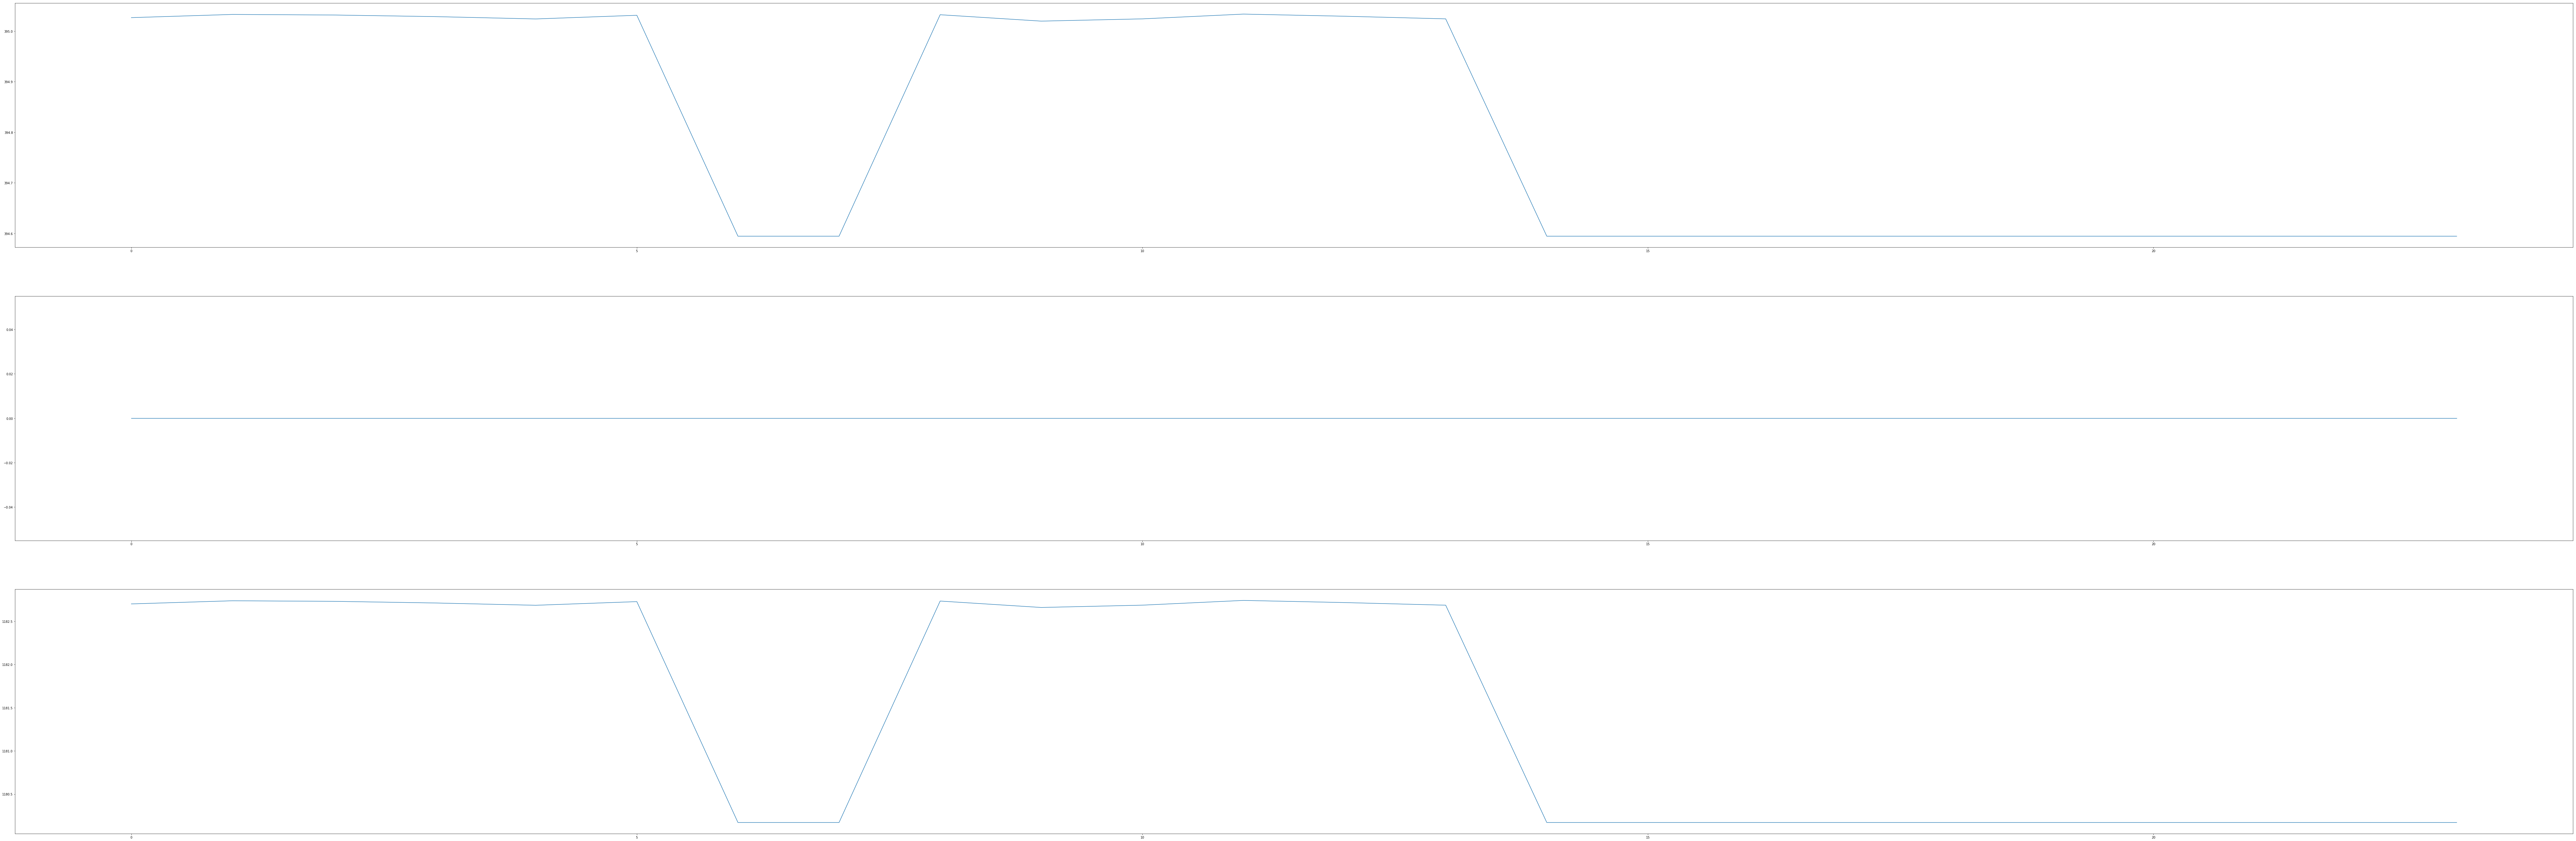

In [22]:
groups = [4,5,6]
i = 1
# plot each column
plt.figure(figsize=(150,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(xhat[:,group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()


In [23]:
new = dataset

In [24]:
new.shape

(280, 8)

In [25]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [26]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
       '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014',
       '01/08/2014', '01/09/2014', '01/10/2014', '01/11/2014', '01/12/2014'],
      dtype='object', name='Date', length=280)

In [27]:
nin=new.index[-1]
print(nin)

01/12/2014


In [28]:
newxhat= pd.DataFrame(xhat,columns=[c for c in new.columns]) 

In [29]:
newxhat.shape

(24, 8)

In [30]:
new=new.append(newxhat)

In [31]:
new.shape

(304, 8)

In [32]:
#new=new.join(data)

In [33]:
new.shape

(304, 8)

In [34]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
                 14,           15,           16,           17,           18,
                 19,           20,           21,           22,           23],
      dtype='object', length=304)

In [35]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/09/1991,672.0,18.0,11.3,148.407080,362.908461,0.0,408.938053,0.0
01/10/1991,1087.0,18.0,29.0,403.517241,513.944398,0.0,785.137931,0.0
01/11/1991,928.0,23.0,29.8,505.671141,380.992112,0.0,1327.248322,0.0
01/12/1991,863.0,26.0,25.2,742.777778,371.964548,0.0,1996.904762,0.0


In [36]:
newbori = new.to_csv('newborib.csv')